处理完成! 结果已保存至: processed_rgb.tif


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
C:\Users\86152\AppData\Local\Temp\ipykernel_27428\4080535117.py:53: UserWarning: Glyph 21407 (\N{CJK UNIFIED IDEOGRAPH-539F}) missing from current font.
  plt.tight_layout()
C:\Users\86152\AppData\Local\Temp\ipykernel_27428\4080535117.py:53: UserWarning: Glyph 22987 (\N{CJK UNIFIED IDEOGRAPH-59CB}) missing from current font.
  plt.tight_layout()
C:\Users\86152\AppData\Local\Temp\ipykernel_27428\4080535117.py:53: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  plt.tight_layout()
C:\Users\86152\AppData\Local\Temp\ipykernel_27428\4080535117.py:53: UserWarning: Glyph 20687 (\N{CJK UNIFIED IDEOGRAPH-50CF}) missing from current font.
  plt.tight_layout()
C:\Users\86152\AppData\Local\Temp\ipykernel_27428\4080535117.py:53: UserWarning: Glyph 22788 (\N{CJK UNIFIED IDEOGRAPH-5904}) missing from current font.
  plt.tight_layout()
C:\Users\86152\AppDa

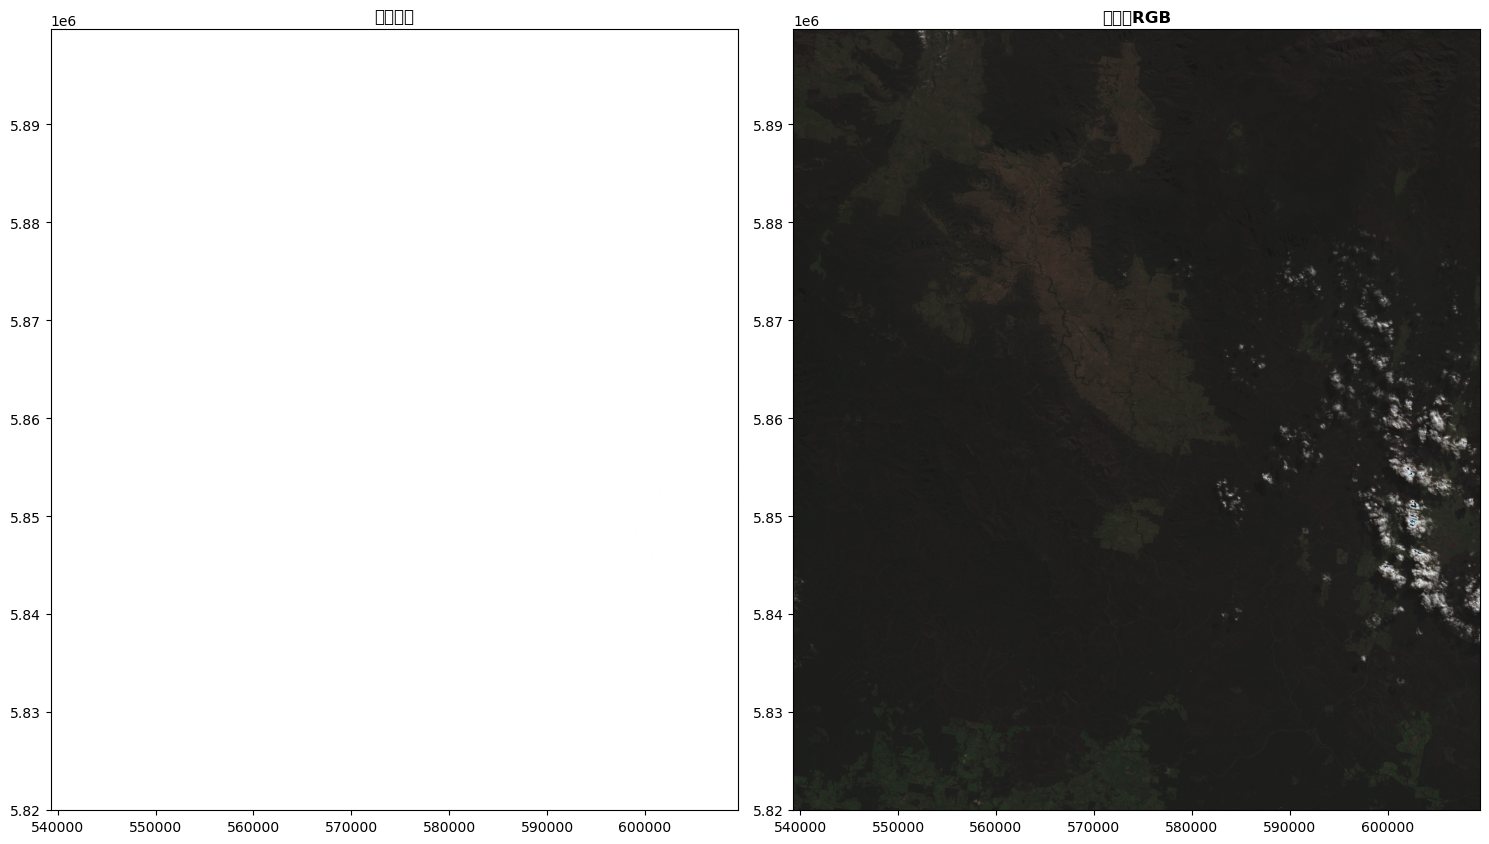

In [6]:
import rasterio
import numpy as np
from rasterio.plot import show
import matplotlib.pyplot as plt

def process_sentinel2_image(input_path, output_path):
    """
    处理 Sentinel-2 图像:
    1. 读取5波段TIFF图像
    2. 将数据范围从0-10000压缩到0-255
    3. 转换为RGB三通道图像
    4. 保存处理结果
    """
    # 1. 读取原始TIFF图像
    with rasterio.open(input_path) as src:
        # 读取所有5个波段 (顺序: [B, G, R, NIR, SWIR])
        bands = src.read()
        profile = src.profile
        
        # 2. 数据压缩 (0-10000 → 0-255)
        # 线性拉伸并转换为8位整数
        compressed = (bands / 10000.0 * 255).astype(np.uint8)
        
        # 3. 选择RGB波段 (通常为B2, B3, B4)
        # 根据波段顺序调整索引
        rgb_indices = [2, 1, 0]  # 红、绿、蓝波段索引
        rgb_image = compressed[rgb_indices, :, :]
        
        # 更新元数据为RGB三通道
        profile.update(
            count=3,  # 三个波段
            dtype=np.uint8
        )
        
        # 4. 保存处理后的图像
        with rasterio.open(output_path, 'w', **profile) as dst:
            dst.write(rgb_image)
    
    print(f"处理完成! 结果已保存至: {output_path}")
    
    # 显示处理前后的对比
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 10))
    
    # 原始图像 (显示真彩色)
    with rasterio.open(input_path) as src:
        # 使用原始波段创建伪彩色图像
        show(src, ax=ax1, title='原始图像')
    
    # 处理后的图像
    with rasterio.open(output_path) as dst:
        show(dst, ax=ax2, title='处理后RGB')
    
    plt.tight_layout()
    plt.savefig('comparison.png', dpi=300)
    plt.show()

# 使用示例
if __name__ == "__main__":
    input_tif = "2020_0427_fire_B2348_B12_10m_roi.tif"  # 输入文件路径
    output_tif = "processed_rgb.tif"   # 输出文件路径
    
    process_sentinel2_image(input_tif, output_tif)